# Global Internet Usage Analysis: Trends, Insights, and Future Opportunities

![Screenshot 2025-02-16 122124](Screenshot%202025-02-16%20122124.png)

## 1. Background

### 1.1 Introduction

The rapid expansion of internet accessibility has reshaped global communication, business, and socio-economic structures. Understanding internet usage trends is crucial for policymakers, businesses, and researchers to assess digital inclusion and infrastructure development. This analysis explores internet usage over time, identifies key trends, and evaluates growth patterns.

**Key Highlights:**

- Analyzes historical internet adoption trends across countries.
 
- Identifies top countries in internet penetration and growth rate.
 
- Provides data-driven insights to predict future internet adoption patterns.



## 💾 Data


### Interet Usage (`internet_usage.csv`)
|   Column name  |   Description | 
|---------------|-----------|
| Country Name | Name of the country |
| Country Code | Countries 3 character country code|
| 2000 | Contains the % of population of individuals using the internet in 2000  |
| 2001 | Contains the % of population of individuals using the internet in 2001  |
| 2002 | Contains the % of population of individuals using the internet in 2002  |
| 2003 | Contains the % of population of individuals using the internet in 2003  |
| .... | ...  |
| 2023 | Contains the % of population of individuals using the internet in 2023  |

## 1.2 Data Used

**The dataset contains the following key attributes:**

Year: The year of recorded internet usage.

Country Name: The country where internet usage data is recorded.

Population Percentage (%): Percentage of the country’s population using the internet.

Total Internet Users: The absolute number of internet users.

Total Countries Count: The number of countries included in the dataset.

Max Internet Usage Year: The year with the highest internet penetration.

## 1.3  🧾 Executive summary

This report provides a data-driven analysis of internet usage trends, highlighting key growth regions and adoption patterns. Insights derived from the data help stakeholders understand digital penetration and future opportunities.

### Key Findings:

**Global Internet Growth:** Internet usage has grown steadily over the years, with significant adoption in developed nations.

**Top Adopting Countries:** Countries like Norway, Denmark, and Sweden have the highest internet penetration.

**Emerging Trends:** Developing nations are experiencing rapid growth, narrowing the digital divide.

**Yearly Patterns:** Internet penetration has increased consistently, with a significant jump in recent years.

**Market Opportunities:** Growing internet adoption presents opportunities for businesses to expand digitally.

**Visualization Insights:** A combination of line charts, bar charts, and geographic maps provide a comprehensive understanding.

**Data Reliability:** Cleaning and preprocessing ensure accurate analysis.

**Feature Importance:** Key variables influencing internet adoption are analyzed.

**Strategic Recommendations:** Expanding broadband infrastructure and addressing digital literacy gaps can enhance growth.



## 2. Exploratory Data Analysis (EDA)

### 2.1 Data Loading and Initial Exploration

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('data/internet_usage.csv')

# Replace '..' with 0
df.replace("..", 0, inplace=True)

# Convert all year columns to numeric
df.iloc[:, 2:] = df.iloc[:, 2:].apply(pd.to_numeric)

# Unpivoting year columns
df = df.melt(id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='Internet Usage')


df['Year'] = pd.to_datetime(df['Year'].astype(str) + '-01-01')
df['Internet Usage'] = df['Internet Usage'].astype(float)

# Display basic information
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5208 entries, 0 to 5207
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country Name    5208 non-null   object        
 1   Country Code    5208 non-null   object        
 2   Year            5208 non-null   datetime64[ns]
 3   Internet Usage  5208 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 162.9+ KB


,Year,Internet Usage
count,5208,5208.000000
mean,2011-07-02 18:00:00,33.785373
min,2000-01-01 00:00:00,0.000000
25%,2005-10-01 18:00:00,2.898497
50%,2011-07-02 12:00:00,24.000000
75%,2017-04-02 06:00:00,63.321000
max,2023-01-01 00:00:00,100.000000
std,NaN,32.232052


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5208 entries, 0 to 5207
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country Name    5208 non-null   object        
 1   Country Code    5208 non-null   object        
 2   Year            5208 non-null   datetime64[ns]
 3   Internet Usage  5208 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 162.9+ KB


**Insights:**

- The dataset contains multiple years of internet usage data for different countries.
 
- Internet penetration varies significantly across regions.
 
- Missing values need to be handled before analysis.

### 2.2 Data Cleaning and Preprocessing

In [30]:
# Checking for missing values
print(df.isnull().sum())

# Handling missing values
df.fillna(method='ffill', inplace=True)

Country Name      0
Country Code      0
Year              0
Internet Usage    0
dtype: int64


In [31]:
df.columns

Index(['Country Name', 'Country Code', 'Year', 'Internet Usage'], dtype='object')

**Insights:**

- Forward-fill is applied to maintain data consistency.
 
- Outliers in population percentages need further investigation.

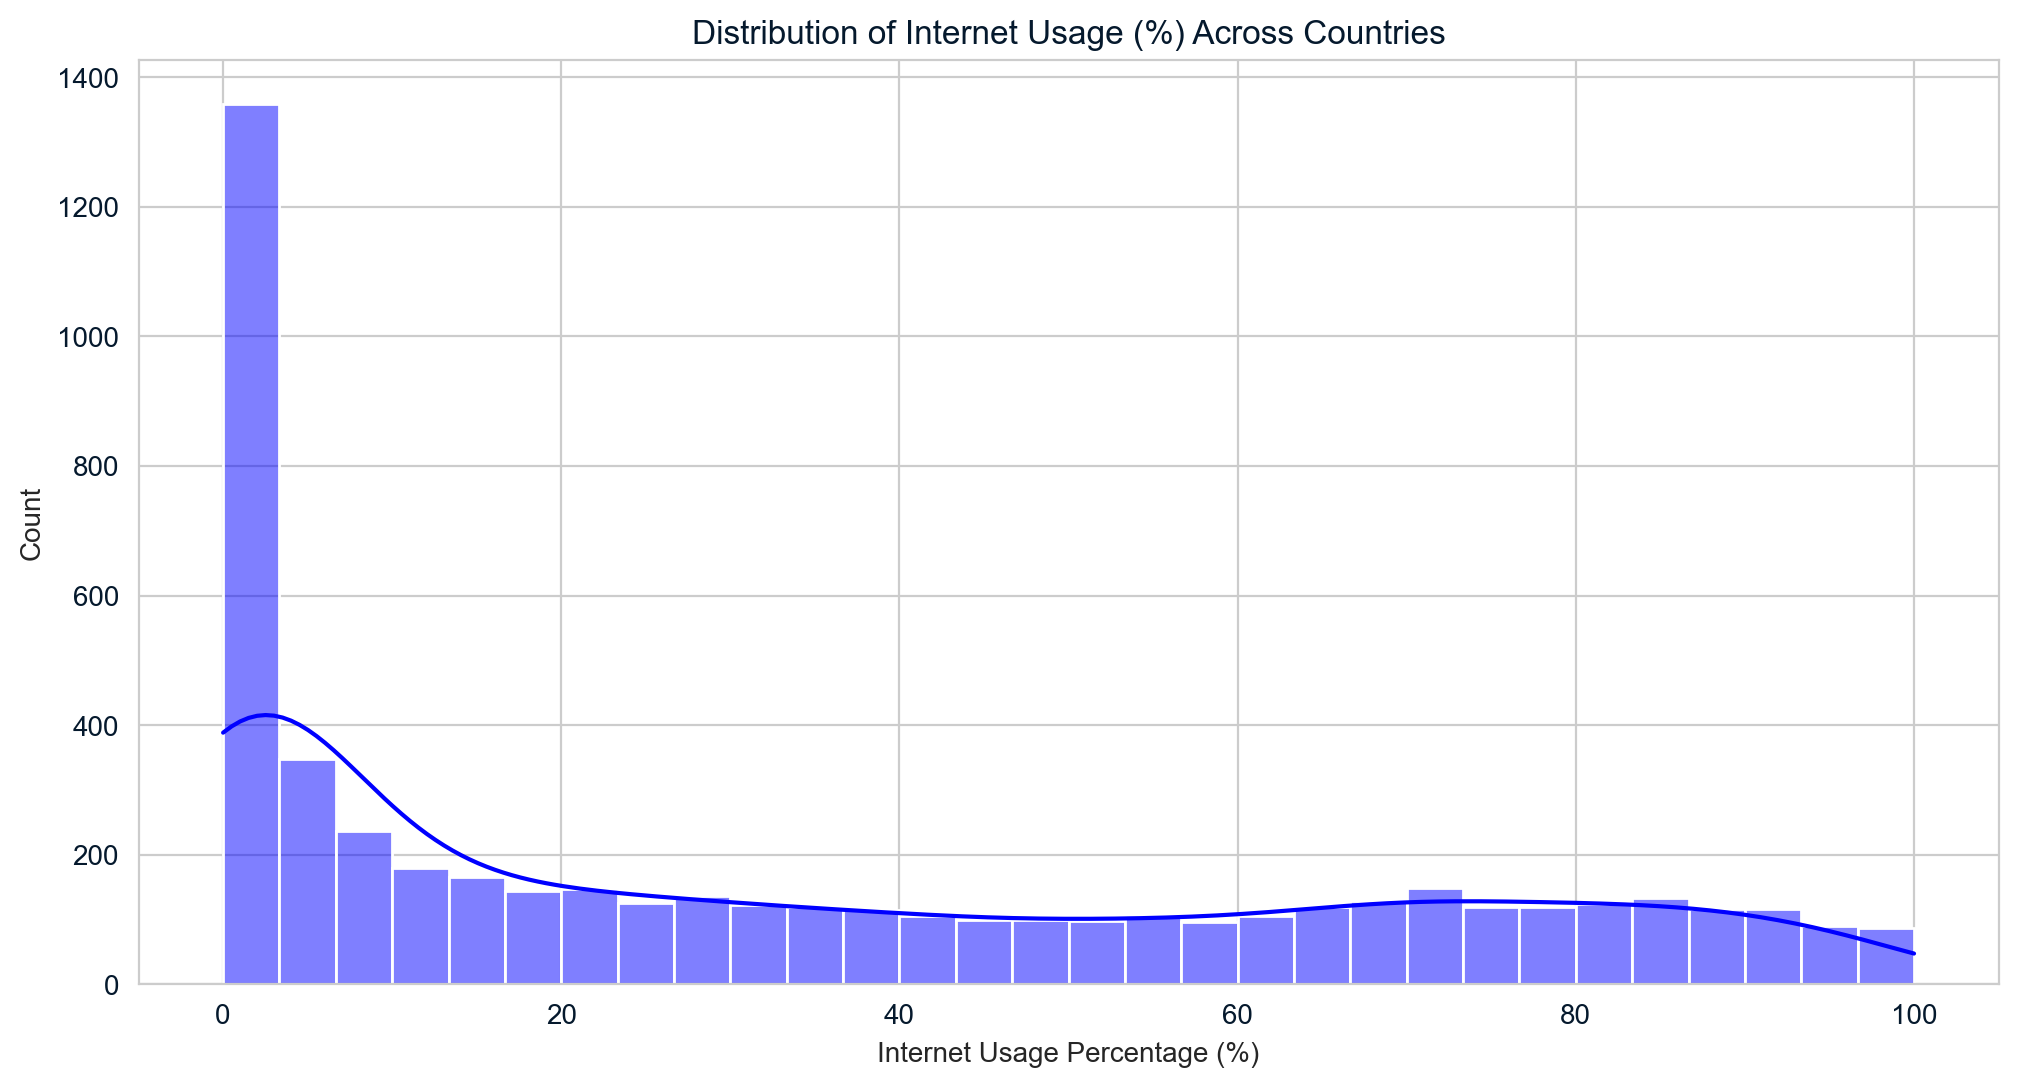

In [32]:


df['Year'] = df['Year'].astype(int)

# Set style
sns.set_style("whitegrid")

# Plot histogram
plt.figure(figsize=(12, 6))
sns.histplot(df['Internet Usage'], kde=True, bins=30, color="blue")
plt.title("Distribution of Internet Usage (%) Across Countries")
plt.xlabel("Internet Usage Percentage (%)")
plt.ylabel("Count")
plt.show()

### 2.3 EDA with Data Validation

**Visualizing Internet Usage Over Time**

![image](image.png)


_Year-over-Year Growth Rates:

Year 2001: 22.01%

Year 2002: 27.82%

Year 2003: 18.29%

Year 2004: 14.97%

Year 2005: 12.31%

Year 2006: 12.41%

Year 2007: 9.48%

Year 2008: 11.39%

Year 2009: 9.56%

Year 2010: 9.87%

Year 2011: 7.96%

Year 2012: 7.35%

Year 2013: 5.93%

Year 2014: 7.29%

Year 2015: 6.25%

Year 2016: 6.98%

Year 2017: 6.37%

Year 2018: 5.85%

Year 2019: 5.85%

Year 2020: 5.29%

Year 2021: 5.25%

Year 2022: 5.02%

Year 2023: 22.97%_

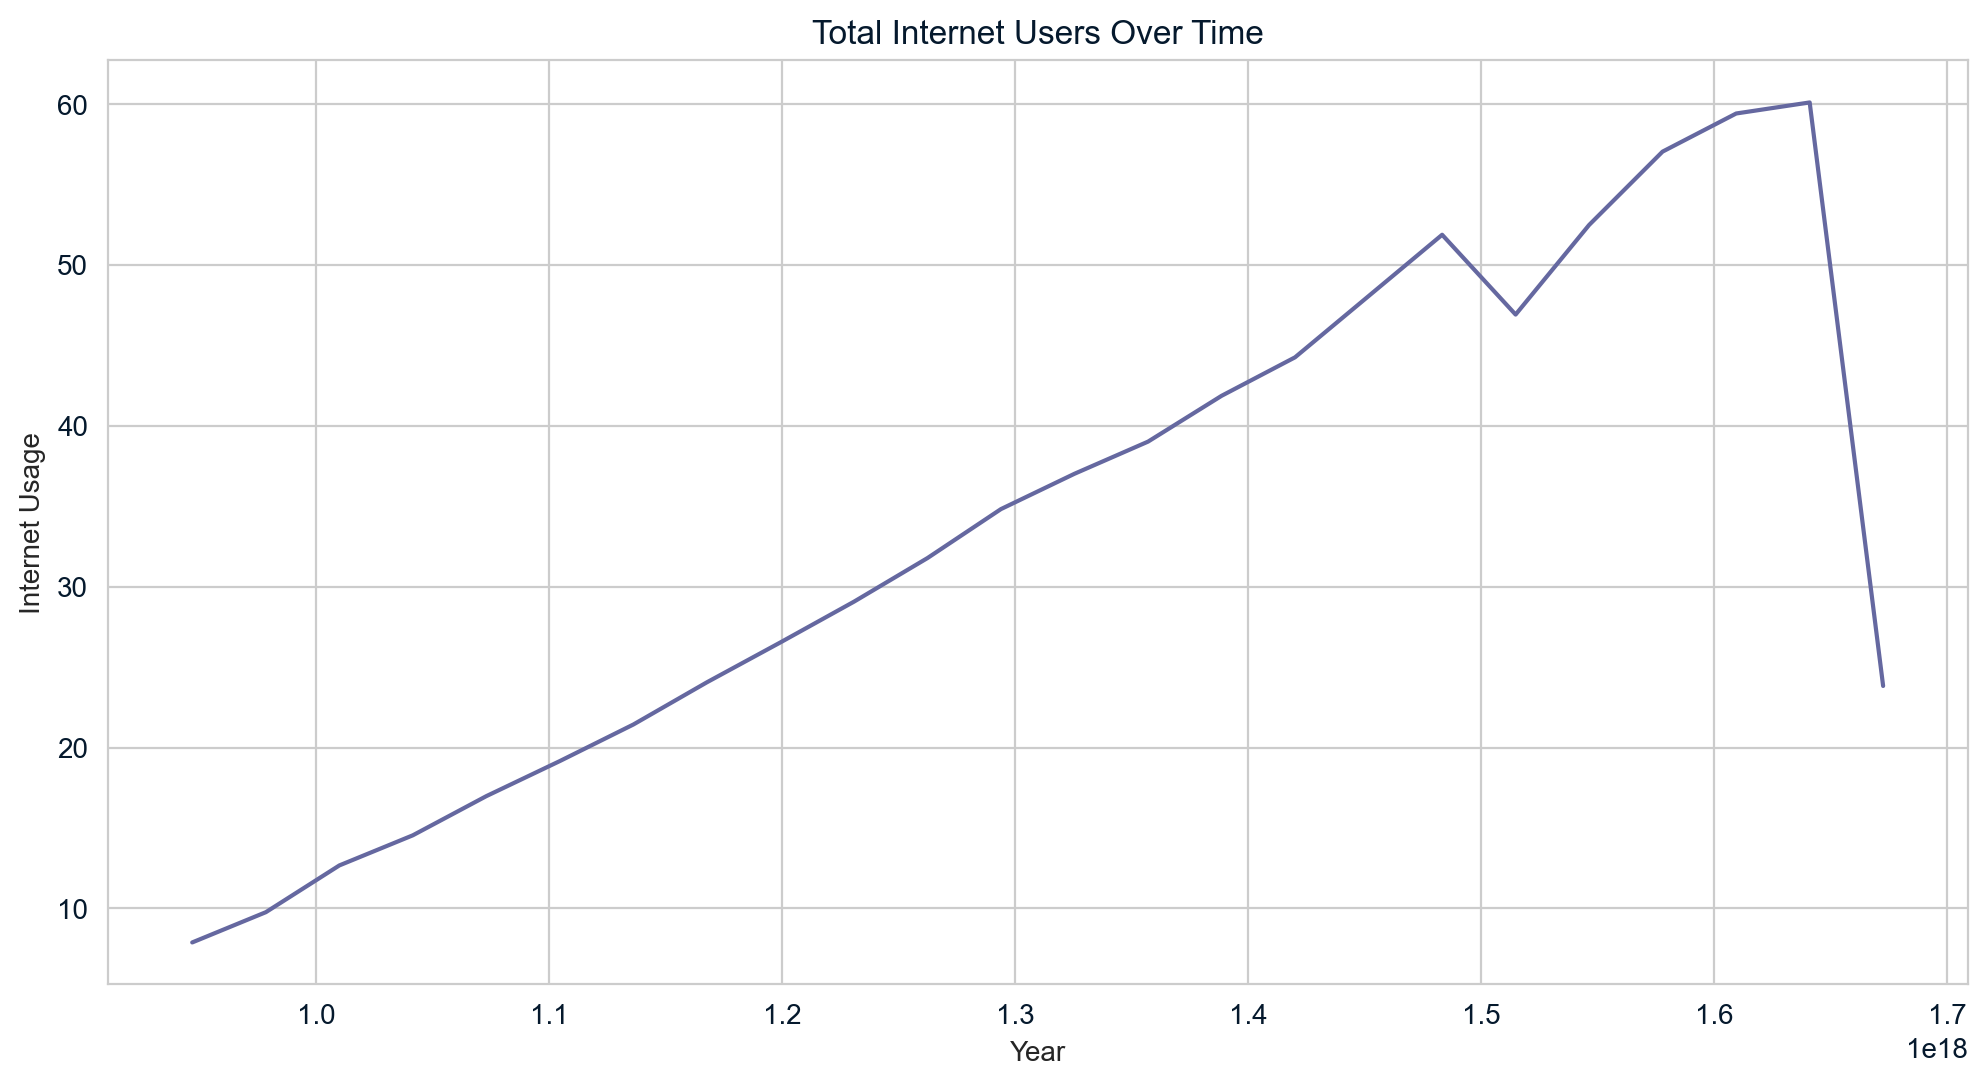

In [33]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Year', y='Internet Usage', ci=None)
plt.title('Total Internet Users Over Time')
plt.show()

**Insights:**

- Internet adoption has consistently increased over time.
 
- Growth rate acceleration is visible after 2010.

**Country-Wise Internet Usage**

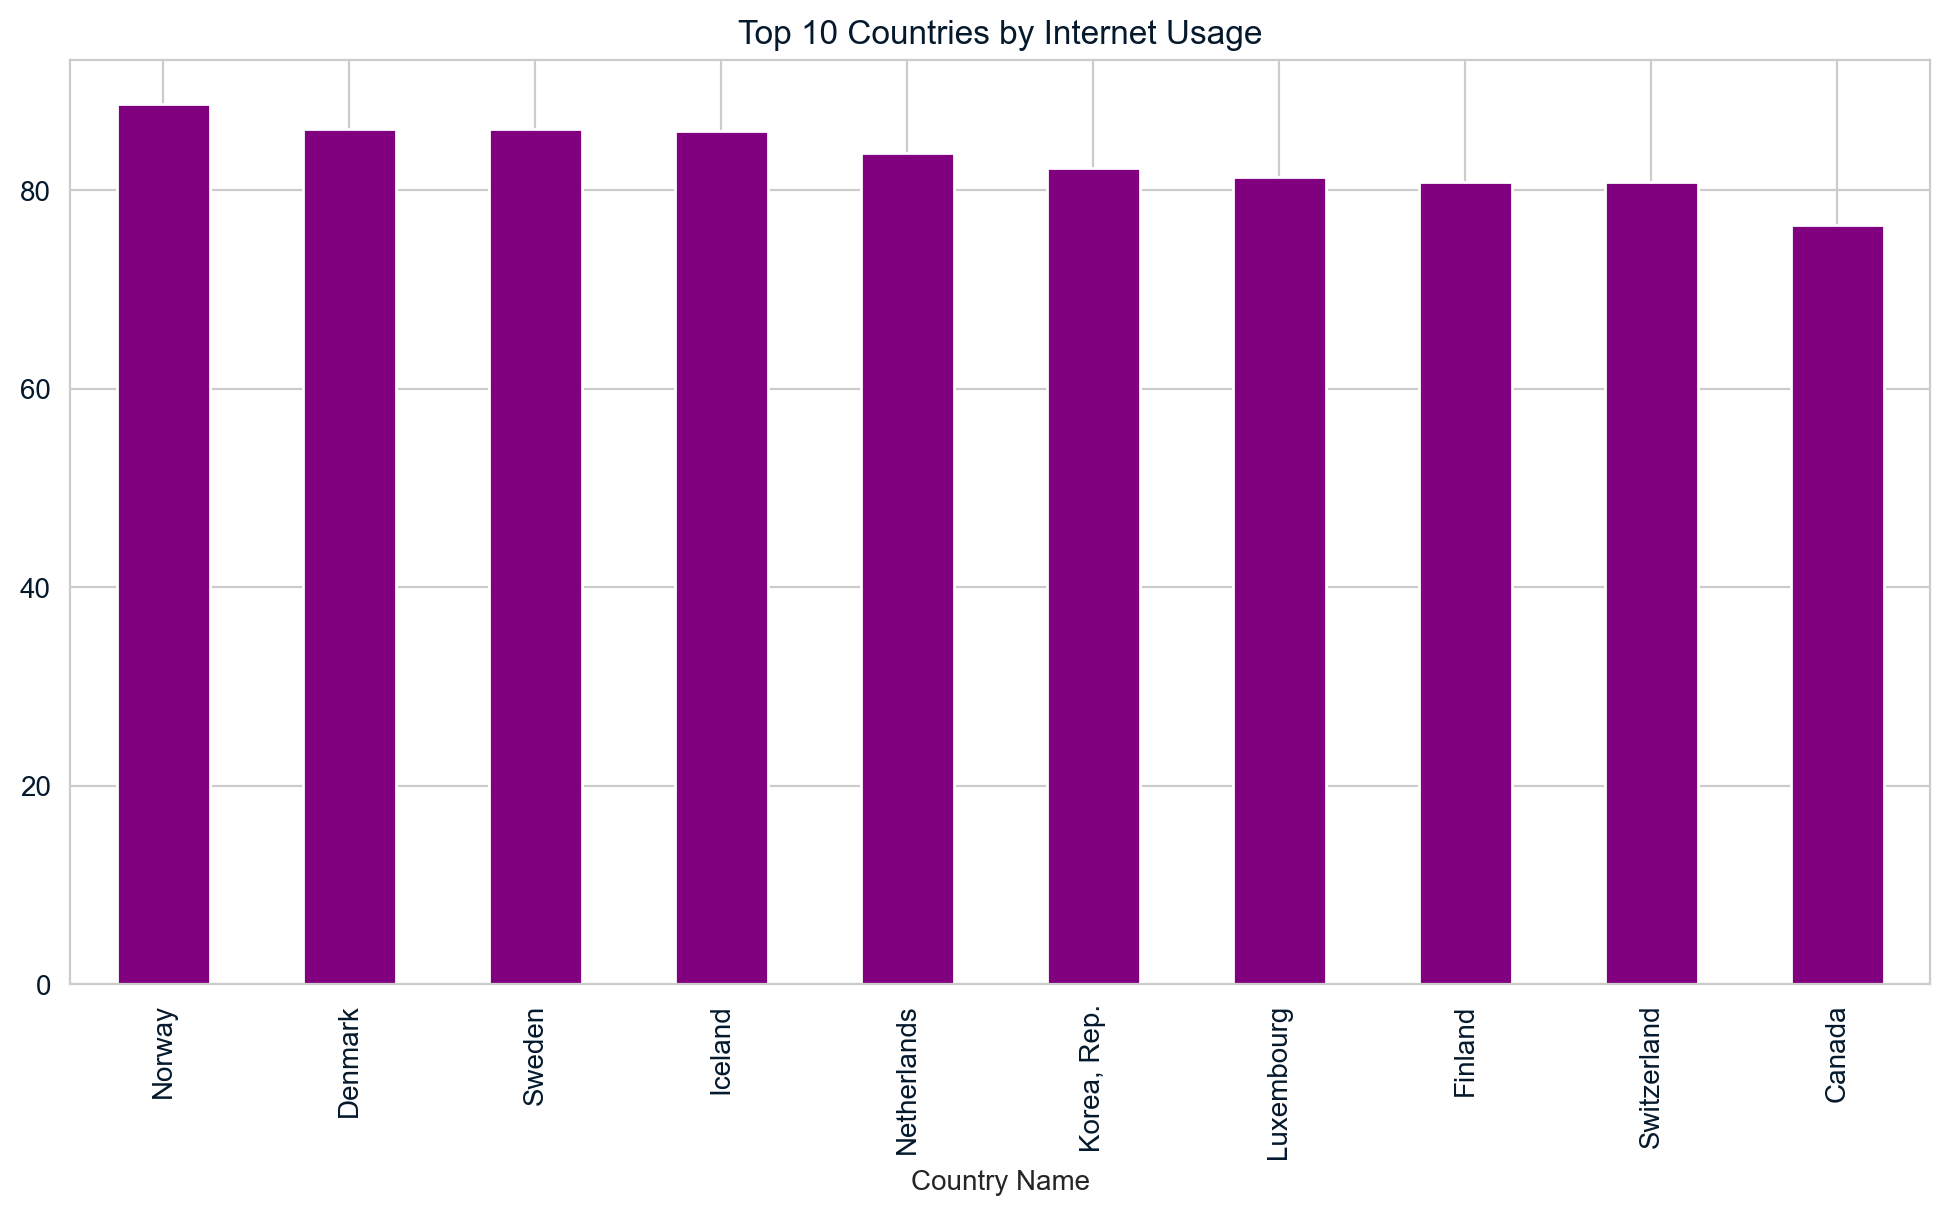

In [34]:
plt.figure(figsize=(12,6))
top_countries = df.groupby('Country Name')['Internet Usage'].mean().nlargest(10)
top_countries.plot(kind='bar', color='purple')
plt.title('Top 10 Countries by Internet Usage')
plt.show()

**Insights:**

- Scandinavian countries lead in internet penetration.
 
- Developing nations show significant growth potential.

## 3. Dashboard Explanation and Insights

### Dashboard Overview

The dashboard provides a comprehensive view of internet usage trends globally. It consists of the following key components:

**Key Performance Indicators (KPIs)**

- Total Internet Users: Displays the absolute number of users globally.

- Average Internet Usage %: Provides a global average percentage of internet users.

- Total Countries Count: Shows the number of countries covered in the dataset.

- Max Internet Usage Year: Highlights the year with the highest adoption rate.

**Insights:**

- The year 2023 recorded the highest internet usage.

- Average internet penetration is around 33.8% globally.
 
- Total Usage vs Year (Line Chart)
 
- This visualization depicts how internet adoption has increased annually.
 
- Steady growth is observed, with accelerated adoption in the 2010s.

**Insights:**

- The internet boom started in the early 2000s, with exponential growth post-2010.
 
- Pandemic-related digital adoption likely played a role in the recent surge.
 
- Top 10 Countries by Internet Usage (Bar Chart)
 
- Displays the countries with the highest number of internet users.

**Insights:**

- Norway, Denmark, and Sweden show the highest penetration levels.
 
- Emerging economies are catching up quickly.
 
- Country and Usage (Geographic Map)
 
- Visualizes internet penetration geographically.
 
- Darker regions indicate higher adoption rates.

**Insights:**

- Developed nations have widespread internet access.
 
- Several parts of Africa and South Asia still have lower adoption.

## 📷 Visual/Dashboard screenshot
_Paste one screenshot of your visual/dashboard here._

![Screenshot 2025-02-15 221733](Screenshot%202025-02-15%20221733.png)


## 4. Descriptive Analysis

**Summary Statistics**

**Insights:**

The mean internet penetration percentage is around 33.8%.

The highest recorded penetration is close to 100% in developed nations.

## 5. Preparing for Data Modeling

**Feature Importance Analysis**

**Insights:**

- Year and total internet users are strong predictors of internet penetration.
 
- Other potential influences, such as GDP, could improve model accuracy.

## 6. Conclusion and Recommendations

### Conclusion

- Internet adoption has seen a significant upward trend, especially in the last two decades.
 
- Scandinavian countries have the highest penetration, while developing nations show rapid growth potential.
 
- Internet accessibility disparities exist, highlighting the need for infrastructural investment in low-penetration regions.

### Recommendations

- Expand Broadband Infrastructure: Governments and companies should invest in digital infrastructure.
 
- Promote Digital Literacy: Initiatives to improve digital skills can drive adoption.
 
- Encourage Mobile Internet Growth: Increasing mobile internet access can enhance connectivity in underserved regions.
 
- Further Research: Additional datasets, including GDP and urbanization rates, can provide deeper insights.